## EDA

1. I got rid of numerical outliers and filled in missing values. To fill in missing non-numerical/categorical data, I found the most common value in each of those columns and replaced the blank cells with those values. To fill in missing numerical data, I found the mean of each of those columns and replaced the blank cells with those means. Also, to get rid of the numerical outliers, I found the absolute value of the z-score for each of those columns and got rid of the rows that had z-scores greater than 3.

In [8]:
# All import statements are listed below.
import pandas as pd
from scipy import stats
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression 
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import seaborn as sns
import csv
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Read the titanic dataset.
data = pd.read_csv("train.csv")

# Store the non-numerical/categorical data.
nonnumericalData = data[["Pclass", "Survived", "Name", "Sex", "Ticket", "Cabin", "Embarked"]]

# Replace missing non-numerical/categorical data by the most common value in each column.
data[["Pclass", "Survived", "Name", "Sex", "Ticket", "Cabin", "Embarked"]] = nonnumericalData.apply(lambda x : x.fillna(x.value_counts().index[0]))

# Replace missing numerical data by the mean in each column.
data["Age"].fillna(value = data["Age"].mean(), inplace = True)
data["SibSp"].fillna(value = data["SibSp"].mean(), inplace = True)
data["Parch"].fillna(value = data["Parch"].mean(), inplace = True)
data["Fare"].fillna(value = data["Fare"].mean(), inplace = True)

# Get the absolute value of the z-score for each numerical column value.
a = np.abs(stats.zscore(data["Age"]))
b = np.abs(stats.zscore(data["SibSp"]))
c = np.abs(stats.zscore(data["Parch"]))
d = np.abs(stats.zscore(data["Fare"]))
# Remove all numerical outliers from all rows and columns.
data = data[(a <= 3) & (b <= 3) & (c <= 3) & (d <= 3)]

2. I chose to display bar charts because they are useful to depict categorical/non-numerical variables. I found that on average, first class tickets cost more than second class tickets. Additionally, on average, second class tickets cost more than third class tickets. Also, I found that as the ticket classes increase (from 1 to 3), the average age decreases. This shows that older people have greater incomes than younger people. Furthermore, males on the titanic had higher socioeconomic statuses than females. Also, people who did not travel with their families generally had higher socioeconomic statuses than people who travelled with their children/parents/siblings/spouses. In addition, people who were travelling from Southampton were richer than people who were travelling from Cherbourg and Queenstown. Lastly, more people with lower socioeconomic statuses did not survive.   

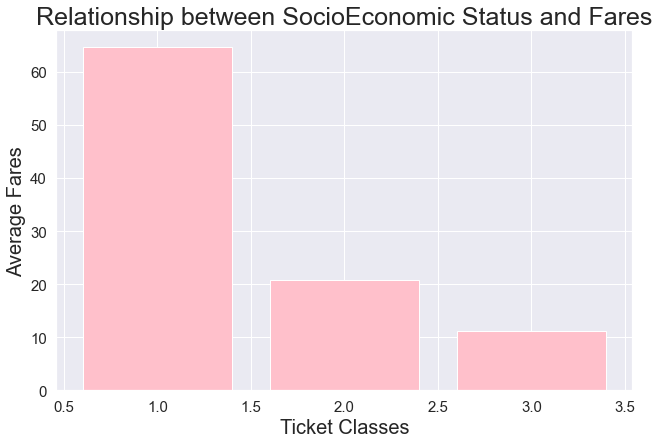

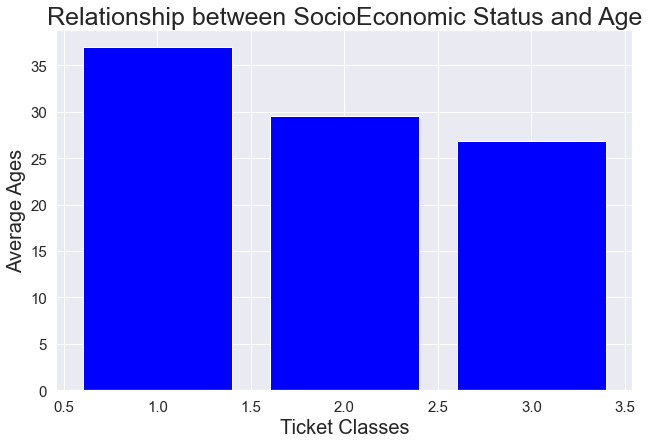

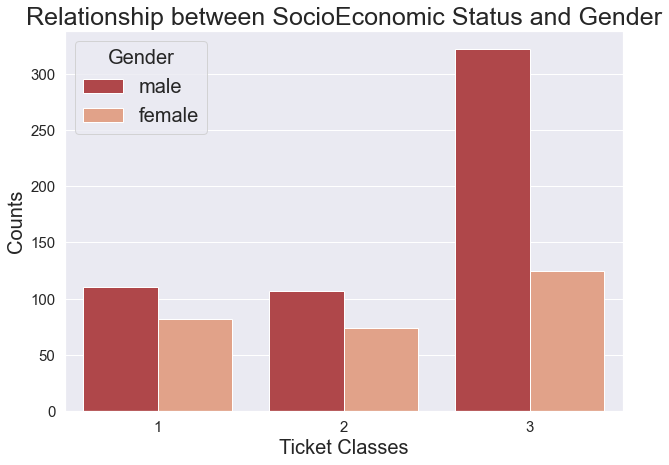

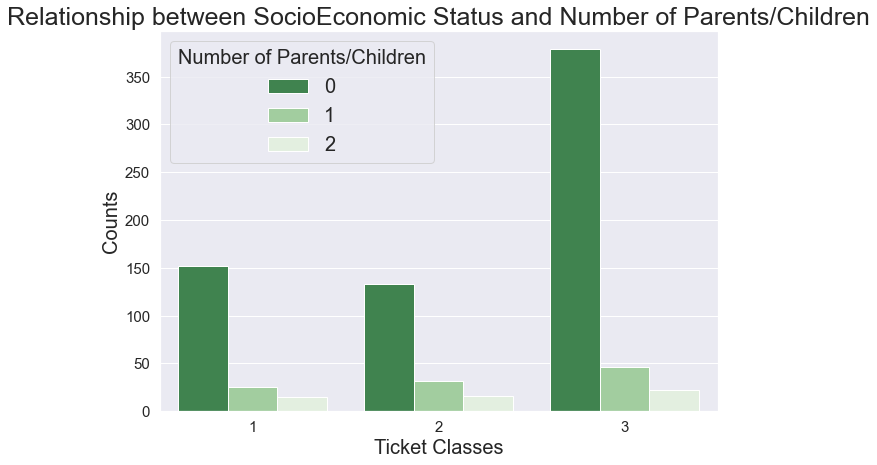

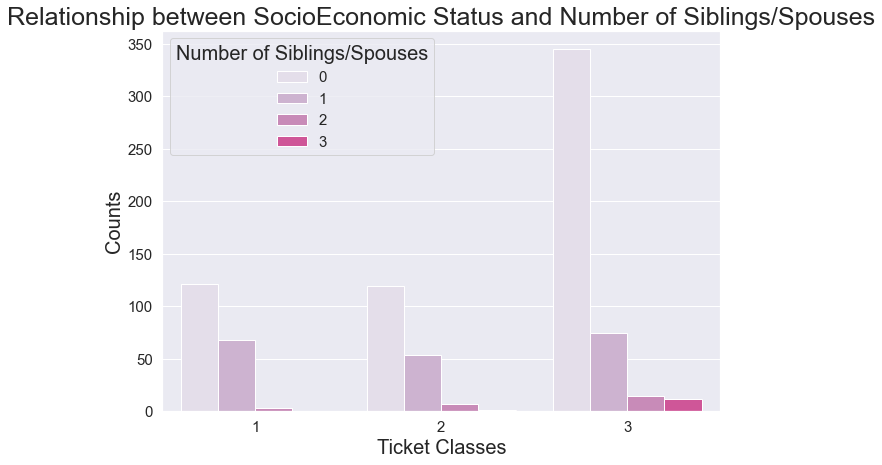

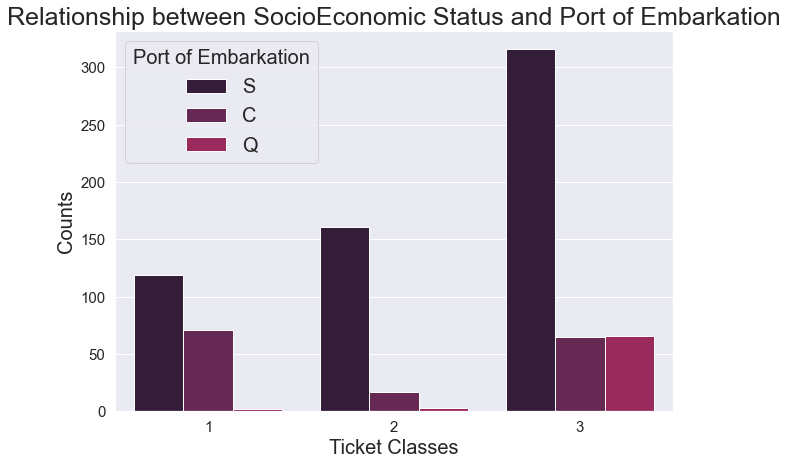

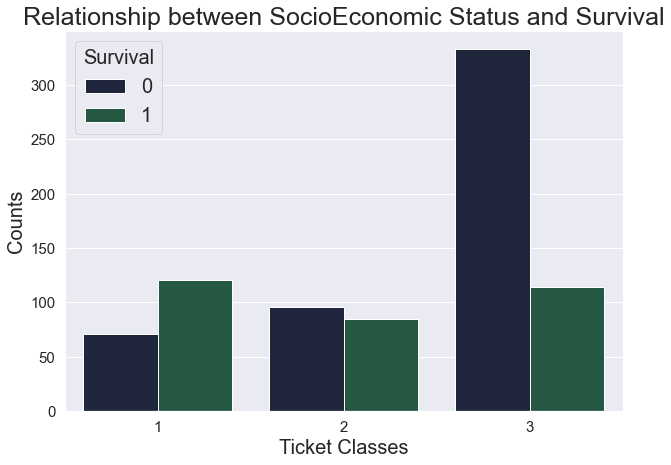

In [9]:
# Group by the ticket classes and get the means of the numerical columns.
dataSocioEconomicStatus = data.groupby("Pclass").mean().reset_index();

# Create a bar chart showing the average fares for the 3 ticket classes.
barPlot = plt.figure(figsize=(8, 5))
axes = barPlot.add_axes([0, 0, 1, 1])
axes.bar(dataSocioEconomicStatus["Pclass"], dataSocioEconomicStatus["Fare"], color = "pink") 
axes.set_title("Relationship between SocioEconomic Status and Fares", fontsize=25)
axes.set_xlabel("Ticket Classes", fontsize=20)
axes.set_ylabel("Average Fares", fontsize=20)
plt.xticks(fontsize=15) 
plt.yticks(fontsize=15) 
plt.show()
print("\n")

# Create a bar chart showing the average ages for the 3 ticket classes.
barPlot = plt.figure(figsize=(8, 5))
axes = barPlot.add_axes([0, 0, 1, 1])
axes.bar(dataSocioEconomicStatus["Pclass"], dataSocioEconomicStatus["Age"], color = "blue") 
axes.set_title("Relationship between SocioEconomic Status and Age", fontsize=25)
axes.set_xlabel("Ticket Classes", fontsize=20)
axes.set_ylabel("Average Ages", fontsize=20)
plt.xticks(fontsize=15) 
plt.yticks(fontsize=15) 
plt.show()
print("\n")

# Create a grouped bar chart showing the ticket classes for the genders.
sns.set_palette("RdBu")
plt.figure(figsize=(10, 7))
ax = sns.countplot(x="Pclass", hue="Sex", data=data)
plt.title("Relationship between SocioEconomic Status and Gender", fontsize=25)
plt.xlabel("Ticket Classes", fontsize=20)
plt.ylabel("Counts", fontsize=20)
x = plt.legend(title="Gender", fontsize=20)
title = x.get_title()
title.set_fontsize(20)
plt.xticks(fontsize=15) 
plt.yticks(fontsize=15) 
plt.show()
print("\n")

# Create a grouped bar chart showing the ticket classes in relationship to the number of parents/children.
sns.set_palette("PRGn_r")
plt.figure(figsize=(10, 7))
ax = sns.countplot(x="Pclass", hue="Parch", data=data)
plt.title("Relationship between SocioEconomic Status and Number of Parents/Children", fontsize=25)
plt.xlabel("Ticket Classes", fontsize=20)
plt.ylabel("Counts", fontsize=20)
x = plt.legend(title="Number of Parents/Children", fontsize=20)
title = x.get_title()
title.set_fontsize(20)
plt.xticks(fontsize=15) 
plt.yticks(fontsize=15)
plt.show()
print("\n")

# Create a grouped bar chart showing the ticket classes in relationship to the number of siblings/spouses.
sns.set_palette("PuRd")
plt.figure(figsize=(10, 7))
ax = sns.countplot(x="Pclass", hue="SibSp", data=data)
plt.title("Relationship between SocioEconomic Status and Number of Siblings/Spouses", fontsize=25)
plt.xlabel("Ticket Classes", fontsize=20)
plt.ylabel("Counts", fontsize=20)
x = plt.legend(title="Number of Siblings/Spouses", fontsize=15, loc="upper left")
title = x.get_title()
title.set_fontsize(20)
plt.xticks(fontsize=15) 
plt.yticks(fontsize=15)
plt.show()
print("\n")

# Create a grouped bar chart showing the ticket classes in relationship to the ports of embarkation.
sns.set_palette("rocket")
plt.figure(figsize=(10, 7))
ax = sns.countplot(x="Pclass", hue="Embarked", data=data)
plt.title("Relationship between SocioEconomic Status and Port of Embarkation", fontsize=25)
plt.xlabel("Ticket Classes", fontsize=20)
plt.ylabel("Counts", fontsize=20)
x = plt.legend(title="Port of Embarkation", fontsize=20)
title = x.get_title()
title.set_fontsize(20)
plt.xticks(fontsize=15) 
plt.yticks(fontsize=15)
plt.show()
print("\n")

# Create a grouped bar chart showing the ticket classes in relationship to survival.
sns.set_palette("cubehelix")
plt.figure(figsize=(10, 7))
ax = sns.countplot(x="Pclass", hue="Survived", data=data)
plt.title("Relationship between SocioEconomic Status and Survival", fontsize=25)
plt.xlabel("Ticket Classes", fontsize=20)
plt.ylabel("Counts", fontsize=20)
x = plt.legend(title="Survival", fontsize=20)
title = x.get_title()
title.set_fontsize(20)
plt.xticks(fontsize=15) 
plt.yticks(fontsize=15)
plt.show()

3. I chose to display bar charts because they are useful to depict categorical/non-numerical variables. On average, people who did not survive were older by a slight amount than the people who survived. Also, on average, people who survived paid more for their tickets than people who did not survive. Additionally, more males did not survive than females. Also, more people who did not travel with their families (spouses/siblings/children/parents) did not survive. Furthermore, more people who were travelling from Southampton did not survive. 

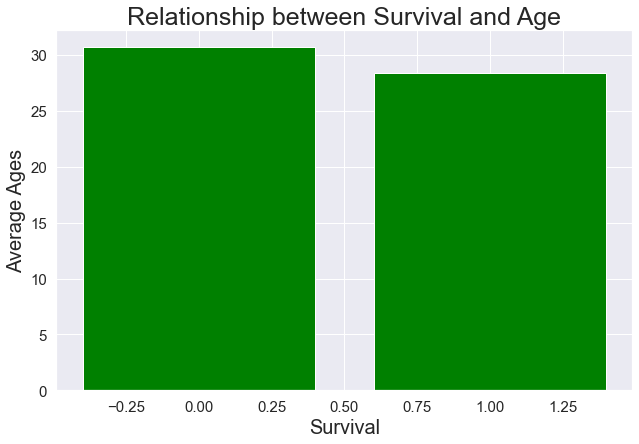

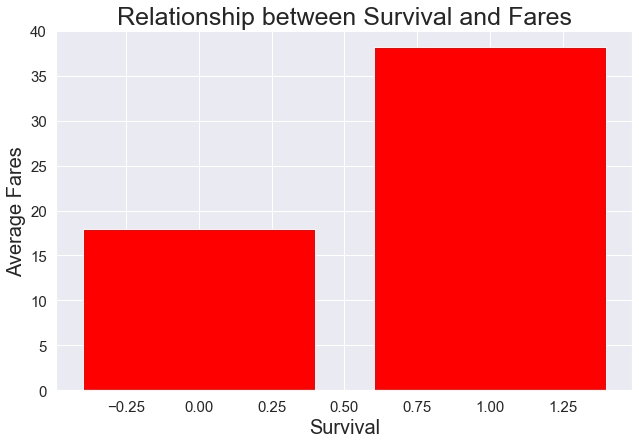

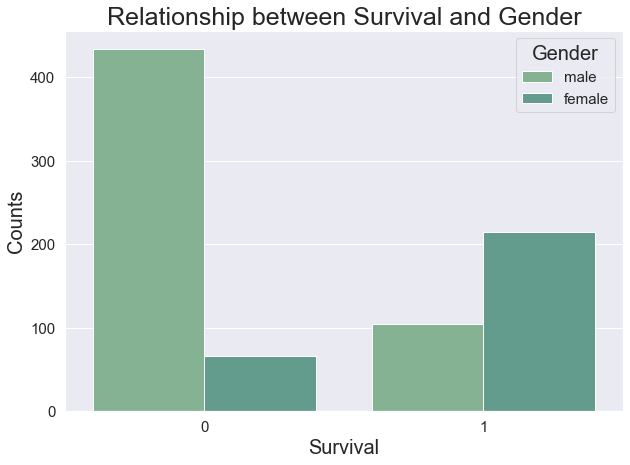

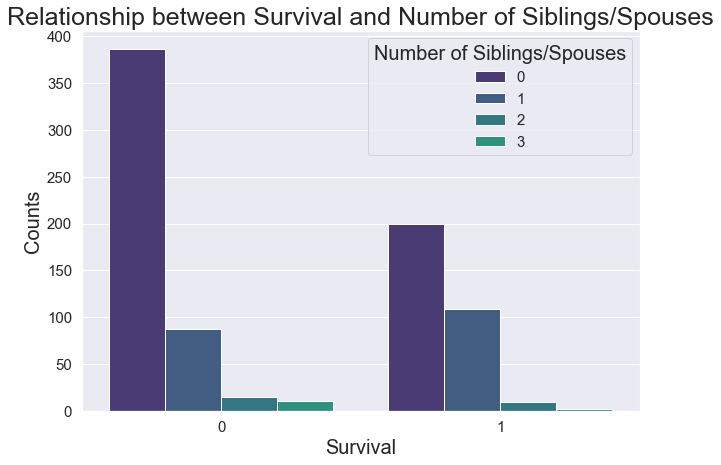

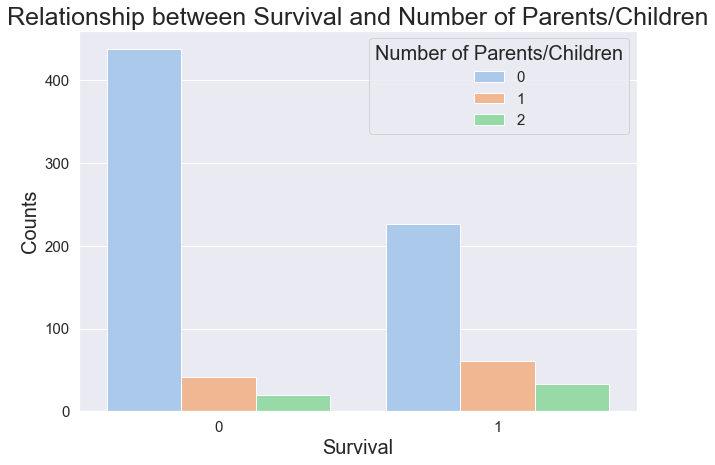

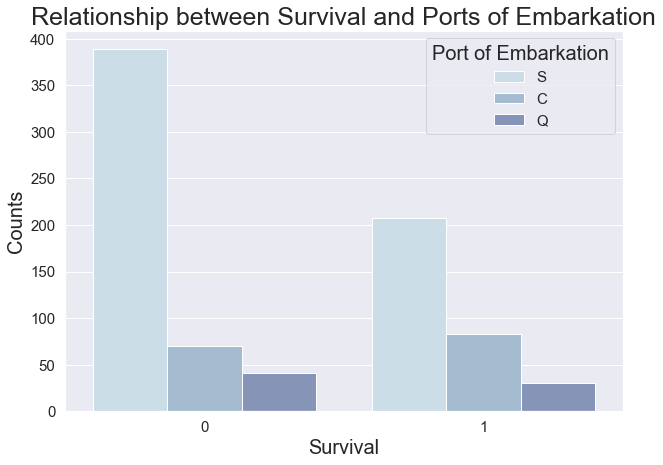

In [10]:
# Group by the survival and get the means of the numerical columns.
dataSurvival = data.groupby("Survived").mean().reset_index();

# Create a bar chart showing the average ages in relationship to survival.
barPlot = plt.figure(figsize=(8, 5))
axes = barPlot.add_axes([0, 0, 1, 1])
axes.bar(dataSurvival["Survived"], dataSurvival["Age"], color = "green") 
axes.set_title("Relationship between Survival and Age", fontsize=25)
axes.set_xlabel("Survival", fontsize=20)
axes.set_ylabel("Average Ages", fontsize=20)
plt.xticks(fontsize=15) 
plt.yticks(fontsize=15) 
plt.show()
print("\n")

# Create a bar chart showing the average fares in relationship to survival.
barPlot = plt.figure(figsize=(8, 5))
axes = barPlot.add_axes([0, 0, 1, 1])
axes.bar(dataSurvival["Survived"], dataSurvival["Fare"], color = "red") 
axes.set_title("Relationship between Survival and Fares", fontsize=25)
axes.set_xlabel("Survival", fontsize=20)
axes.set_ylabel("Average Fares", fontsize=20)
plt.xticks(fontsize=15) 
plt.yticks(fontsize=15) 
plt.show()
print("\n")

# Create a grouped bar chart showing the gender in relationship to survival.
sns.set_palette("crest")
plt.figure(figsize=(10, 7))
ax = sns.countplot(x="Survived", hue="Sex", data=data)
plt.title("Relationship between Survival and Gender", fontsize=25)
plt.xlabel("Survival", fontsize=20)
plt.ylabel("Counts", fontsize=20)
x = plt.legend(title="Gender", fontsize=15, loc="upper right")
title = x.get_title()
title.set_fontsize(20)
plt.xticks(fontsize=15) 
plt.yticks(fontsize=15)
plt.show()
print("\n")


# Create a grouped bar chart showing the number of siblings/spouses in relationship to survival.
sns.set_palette("viridis")
plt.figure(figsize=(10, 7))
ax = sns.countplot(x="Survived", hue="SibSp", data=data)
plt.title("Relationship between Survival and Number of Siblings/Spouses", fontsize=25)
plt.xlabel("Survival", fontsize=20)
plt.ylabel("Counts", fontsize=20)
x = plt.legend(title="Number of Siblings/Spouses", fontsize=15, loc="upper right")
title = x.get_title()
title.set_fontsize(20)
plt.xticks(fontsize=15) 
plt.yticks(fontsize=15)
plt.show()
print("\n")

# Create a grouped bar chart showing the number of parents/children in relationship to survival.
sns.set_palette("pastel")
plt.figure(figsize=(10, 7))
ax = sns.countplot(x="Survived", hue="Parch", data=data)
plt.title("Relationship between Survival and Number of Parents/Children", fontsize=25)
plt.xlabel("Survival", fontsize=20)
plt.ylabel("Counts", fontsize=20)
x = plt.legend(title="Number of Parents/Children", fontsize=15, loc="upper right")
title = x.get_title()
title.set_fontsize(20)
plt.xticks(fontsize=15) 
plt.yticks(fontsize=15)
plt.show()
print("\n")

# Create a grouped bar chart showing the ports of embarkation in relationship to survival.
sns.set_palette("ch:s=.25,rot=-.25")
plt.figure(figsize=(10, 7))
ax = sns.countplot(x="Survived", hue="Embarked", data=data)
plt.title("Relationship between Survival and Ports of Embarkation", fontsize=25)
plt.xlabel("Survival", fontsize=20)
plt.ylabel("Counts", fontsize=20)
x = plt.legend(title="Port of Embarkation", fontsize=15, loc="upper right")
title = x.get_title()
title.set_fontsize(20)
plt.xticks(fontsize=15) 
plt.yticks(fontsize=15)
plt.show()

4. The highest positive correlation between different attributes is between survival ("Survived") and fare ("Fare") which is 0.33, and the highest negative correlation between different attributes is between the ticket class ("Pclass") and fare ("Fare") which is -0.69. Also, the relationship between survival ("Survived") and ticket class ("Pclass") is negative (-0.32). Therefore, the most important features include "Survived", "Pclass", and "Fare". These features are interesting because they explain the socioeconomic statuses of the passengers and their survival. 

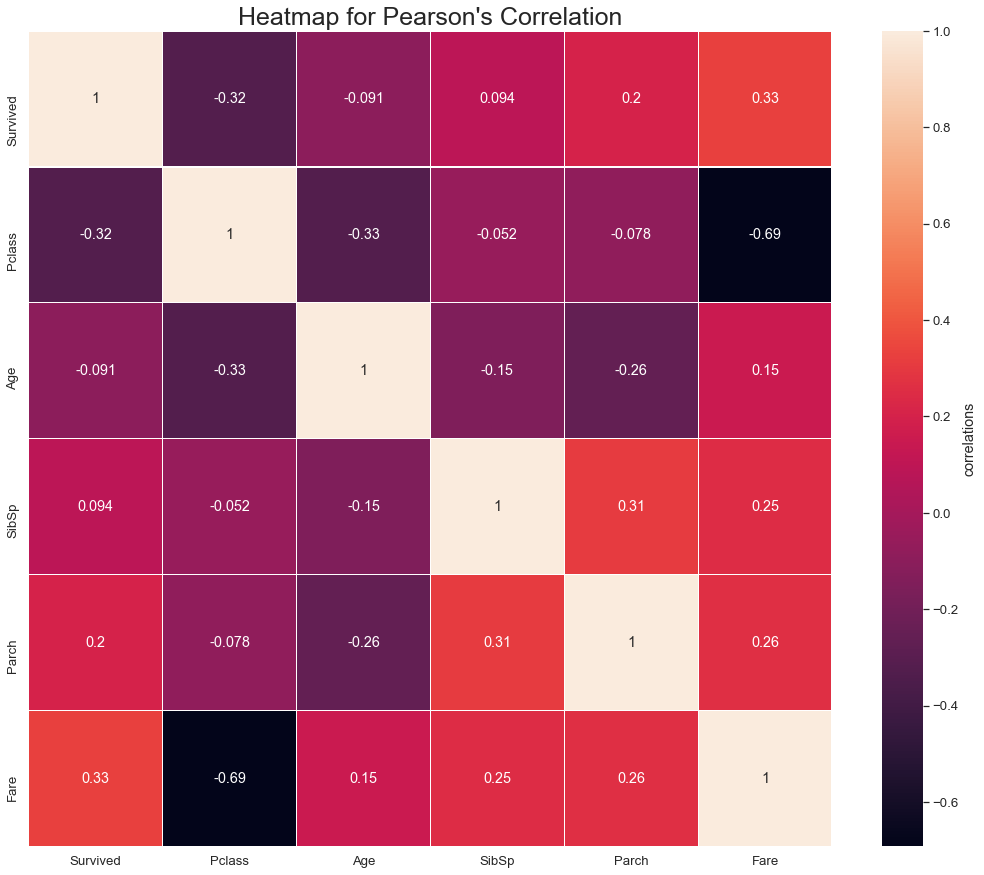

In [11]:
# Store the numerical/categorical features.
numericalData = data[["Survived", "Pclass", "Age", "SibSp", "Parch", "Fare"]]

# Plot a heatmap that shows the pearson correlation between different pairs of numerical/categorical features.
plt.figure(figsize=(18, 15))
plt.title("Heatmap for Pearson's Correlation", fontsize=25) 
sns.heatmap(numericalData.corr(method = "pearson"), annot=True, linewidth=0.5, cbar_kws={'label': 'correlations'}) 
sns.set(font_scale=1.2)
plt.show()

5. One way to extract information from non-numerical features is to create a word cloud as shown below (below is a word cloud for the names of the passengers). I found that "Mr" and "Miss" appeared frequently in the passengers' names. Another way is to create a bar chart as shown before (for example, I created a grouped bar chart to analyze the relationship between survival and gender). 

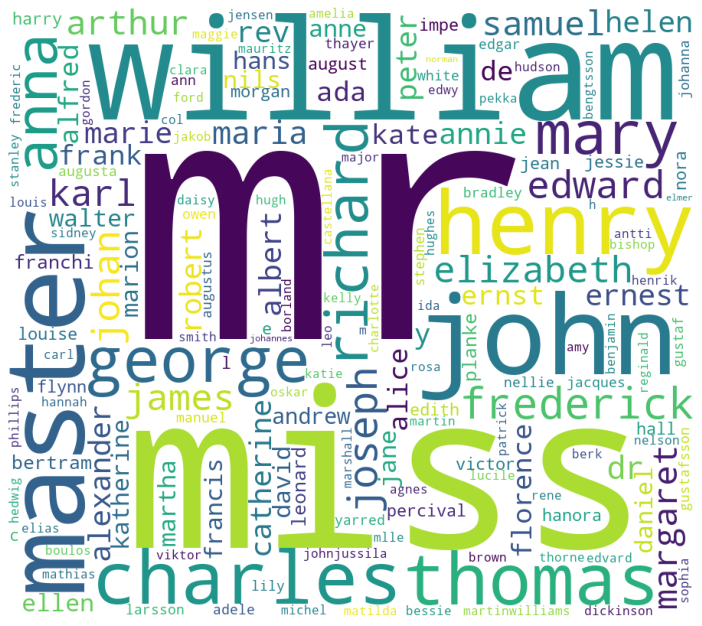

In [12]:
# Create an empty collection of words in the beginning.
collectionWords = ""

# Iterate through the names in each row.
for name in data.Name:
    
    # Split the name into words.
    listOfWords = (str(name)).split()
    # Store the length of the words in a variable. 
    lengthOfList = len(listOfWords)
    
    # Iterate through the list of words in order to make the words lowercase. 
    # Also, add each word to the collectionWords variable.
    for i in range(lengthOfList):
        listOfWords[i] = listOfWords[i].lower() 
        if i <= (lengthOfList-2):
            collectionWords += (listOfWords[i] + " ") 
        else:
            collectionWords += listOfWords[i]
            
# Create the word cloud.
wordcloud = WordCloud(width = 900, height = 800, stopwords = set(STOPWORDS), min_font_size = 12, background_color ='white').generate(collectionWords)
plt.figure(figsize = (10, 15))
plt.imshow(wordcloud)
plt.tight_layout(pad = 0)
plt.axis("off")
plt.show()

## Modeling and Question Answering

Models:

The logistic regression algorithm tries to find a line that distinguishes between classes. It uses the sigmoid  function to estimate the probabilities of being in a certain class, and it has a cost function that increases when
the predictions are incorrect.
    
The KNN (K Nearest Neighbors) algorithm assigns/predicts a label for a data point by analyzing the distances between 
the data point and its K nearest neighbors. Distance metrics must follow some rules like positivity to be 
considered as standards of measurement in the KNN algorithm. 
    
The SVM (Support Vector Machine) algorithm creates a decision boundary between classes by using hyperplanes. For 
non-linear data, SVM increases the dimensional space and uses kernel functions to get decision boundaries in higher-dimensional spaces. 

    


Note: The results explained may differ from the results shown below because every time I run the code, I get different results.

Performance of the Models (Training and Test Sets):

It seems like Logistic Regression did a good job of predicting the survival of passengers. The F1-scores, 
accuracies, precisions, and recalls are pretty high which indicates that the model did well in predicting survival.
    
Also, the K Nearest Neighbors did not do a good job of predicting the survival of passengers. I think the
reason for this is because the distance metric used (Euclidean distance) might not be a great measure to classify the 
survival of the passengers. However, the F1-scores, accuracies, precisions, and recalls are pretty high which indicates that the model actually did well in predicting survival.
    
Lastly, the Support Vector Machine algorithm did an okay job of predicting the survival of passengers. I
think the reason for this is because the linear kernel might not be able to classify accurately. However, the F1-
scores, accuracies, precisions, and recalls are pretty high which indicates that the model actually did well in predicting survival.   


Performance of the Models with Hyperparameter Tuning (Training, Test, and Cross Validation Sets):

It seems like the performance of Logistic Regression did not change relative to the performance when the data was only split into training and test sets. 

Also, the K Nearest Neighbors algorithm seems to have improved in accuracy and precision relative to the performance when the data was only split into training and test sets.

Lastly, the Support Vector Machine algorithm seems to have improved in accuracy relative to the performance when the data was only split into training and test sets.

In [13]:
# Split the data into training and test sets.
print("Training and Testing:")
print("\n")
trainingSet, testSet = train_test_split(data, test_size=0.2, train_size=0.8, shuffle=True)

# Create an instance of the LogisticRegression class.
model = LogisticRegression()
# Get the training attributes for the logistic regression model.
x = trainingSet[["Pclass", "Fare", "Age", "SibSp", "Parch"]] 
# Get the survival (target/prediction) attribute for the logistic regression model.
y = trainingSet["Survived"]
# Fit the model.
model.fit(x, y)

# Store the input values from the test set.
test = testSet[["Pclass", "Fare", "Age", "SibSp", "Parch"]]
# Predict the survival by using most of the data in the test set. 
predictedValues = model.predict(test)
# Get the actual survival values from the test set.
actualVals = testSet[["Survived"]].values

# Iterate through all of the actual values and create a 1-dimensional array.
actualValues = []
for i in range(0, len(actualVals)):
    for j in range(0, len(actualVals[i])): 
        actualValues.append(actualVals[i][j]);
        
# Print a dataframe that contains the actual values and the predicted values.
print("Logistic Regression:")
print("\n")
actualAndPredicted = pd.DataFrame({"PassengerId": testSet["PassengerId"], "Actual Values": actualValues, "Predicted Values": predictedValues})
print(actualAndPredicted)
print("\n")
# Calculate the evaluation metrics.
print(classification_report(actualValues, predictedValues, zero_division=1))
print("\n")
print("\n")

# Create an instance of the KNeighborsClassifier class.
knn = KNeighborsClassifier(n_neighbors=5)
# Fit the model.
knn.fit(x, y)
# Predict the survival by using most of the data in the test set. 
predictedKNNValues = knn.predict(test)

# Print a dataframe that contains the actual values and the predicted values.
print("K Nearest Neighbors (KNN):")
print("\n")
actualAndPredicted = pd.DataFrame({"PassengerId": testSet["PassengerId"], "Actual Values": actualValues, "Predicted Values": predictedKNNValues})
print(actualAndPredicted)
print("\n")
# Calculate the evaluation metrics.
print(classification_report(actualValues, predictedKNNValues, zero_division=1))
print("\n")
print("\n")

# Create an instance of the SVM Classifier.
svmModel = svm.SVC(kernel="linear")
# Fit the model.
svmModel.fit(x, y)
# Predict the survival by using most of the data in the test set. 
predictedSVMValues = svmModel.predict(test)

# Print a dataframe that contains the actual values and the predicted values.
print("SVM (Support Vector Machine):")
print("\n")
actualAndPredicted = pd.DataFrame({"PassengerId": testSet["PassengerId"], "Actual Values": actualValues, "Predicted Values": predictedSVMValues})
print(actualAndPredicted)
print("\n")
# Calculate the evaluation metrics.
print(classification_report(actualValues, predictedSVMValues, zero_division=1))
print("\n")
print("\n")
print("\n")




print("Training, Testing, and Cross Validation:")
print("\n")
# Create an instance of the LogisticRegression class.
model = LogisticRegression()
# Use grid search/cross validation for parameter tuning.
gridValues = {'C':[0.000001, 0.001, 0.009, 0.01, .09, 1, 5, 10, 15, 25]}
grid = GridSearchCV(model, param_grid=gridValues, cv=10, scoring="accuracy")
grid.fit(x, y)
# Predict the survival by using most of the data in the test set. 
predictedValues = grid.predict(test)

# Print a dataframe that contains the actual values and the predicted values.
print("Logistic Regression:")
print("\n")
actualAndPredicted = pd.DataFrame({"PassengerId": testSet["PassengerId"], "Actual Values": actualValues, "Predicted Values": predictedValues})
print(actualAndPredicted)
print("\n")
# Calculate the evaluation metrics.
print(classification_report(actualValues, predictedValues, zero_division=1))
print("\n")
print("\n")

# Create an instance of the KNeighborsClassifier class.
knn = KNeighborsClassifier(n_neighbors=5)
# Use grid search/cross validation for parameter tuning.
kVals = dict(n_neighbors=list(range(1, 51)))
grid = GridSearchCV(knn, param_grid=kVals, cv=10, scoring="accuracy")
# Fit the model.
grid.fit(x, y)
# Predict the survival by using most of the data in the test set. 
predictedKNNValues = grid.predict(test)

# Print a dataframe that contains the actual values and the predicted values.
print("K Nearest Neighbors (KNN):")
print("\n")
actualAndPredicted = pd.DataFrame({"PassengerId": testSet["PassengerId"], "Actual Values": actualValues, "Predicted Values": predictedKNNValues})
print(actualAndPredicted)
print("\n")
# Calculate the evaluation metrics.
print(classification_report(actualValues, predictedKNNValues, zero_division=1))
print("\n")
print("\n")

# Create an instance of the SVM Classifier.
svmModel = svm.SVC(kernel="linear")
# Use grid search/cross validation for parameter tuning.
gridValues = {'C':[0.000001, 0.001, 0.009, 0.01, .09, 1, 5, 10, 15, 25]}
grid = GridSearchCV(svmModel, param_grid=gridValues, cv=10, scoring="accuracy")
# Fit the model.
grid.fit(x, y)
# Predict the survival by using most of the data in the test set. 
predictedSVMValues = grid.predict(test)

# Print a dataframe that contains the actual values and the predicted values.
print("SVM (Support Vector Machine):")
print("\n")
actualAndPredicted = pd.DataFrame({"PassengerId": testSet["PassengerId"], "Actual Values": actualValues, "Predicted Values": predictedSVMValues})
print(actualAndPredicted)
print("\n")
# Calculate the evaluation metrics.
print(classification_report(actualValues, predictedSVMValues, zero_division=1))

Training and Testing:


Logistic Regression:


     PassengerId  Actual Values  Predicted Values
413          414              0                 0
151          152              1                 1
52            53              1                 1
468          469              0                 0
53            54              1                 0
..           ...            ...               ...
132          133              0                 0
783          784              0                 0
342          343              0                 0
173          174              0                 0
655          656              0                 1

[164 rows x 3 columns]


              precision    recall  f1-score   support

           0       0.72      0.88      0.79        98
           1       0.73      0.50      0.59        66

    accuracy                           0.73       164
   macro avg       0.73      0.69      0.69       164
weighted avg       0.73      0.73      0.71       164

